# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Importing the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [3]:
df.shape

(800, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

As per the above information regarding the data in each column we can observe that tere are no null values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Cleaning

In [6]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In the above two outputs we can observe some ambiguity that there are '?', 'others', and 'Others' which all must be the same as they are unknown or we can say that null values have been substituted with some indicator

In [7]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

## Converting 'yes' and 'no' to 1 and 0

In [8]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

# Exploratory Data Analysis

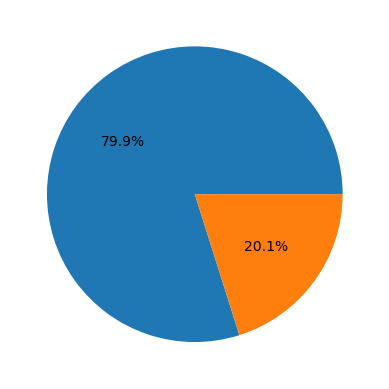

In [9]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

The dataset we have is highly imbalanced. If we wll train our model using this data then the model will face a hard time predicting the positive class which is our main objective here.

# To predict whether a person has autism or not with high accuracy

In [10]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == 'int64':
        ints.append(col)
    elif df[col].dtype == 'object':
        objects.append(col)
    else:
        floats.append(col)

The 'ID' column will contain a unique value for each of the rows and for the columns 'Class/ASD' we have already analysed its distribution. So, that is why they should be removed as follows:

In [11]:
ints.remove('ID')
ints.remove('Class/ASD')

# Converting the data to a Long-Forrm using melt

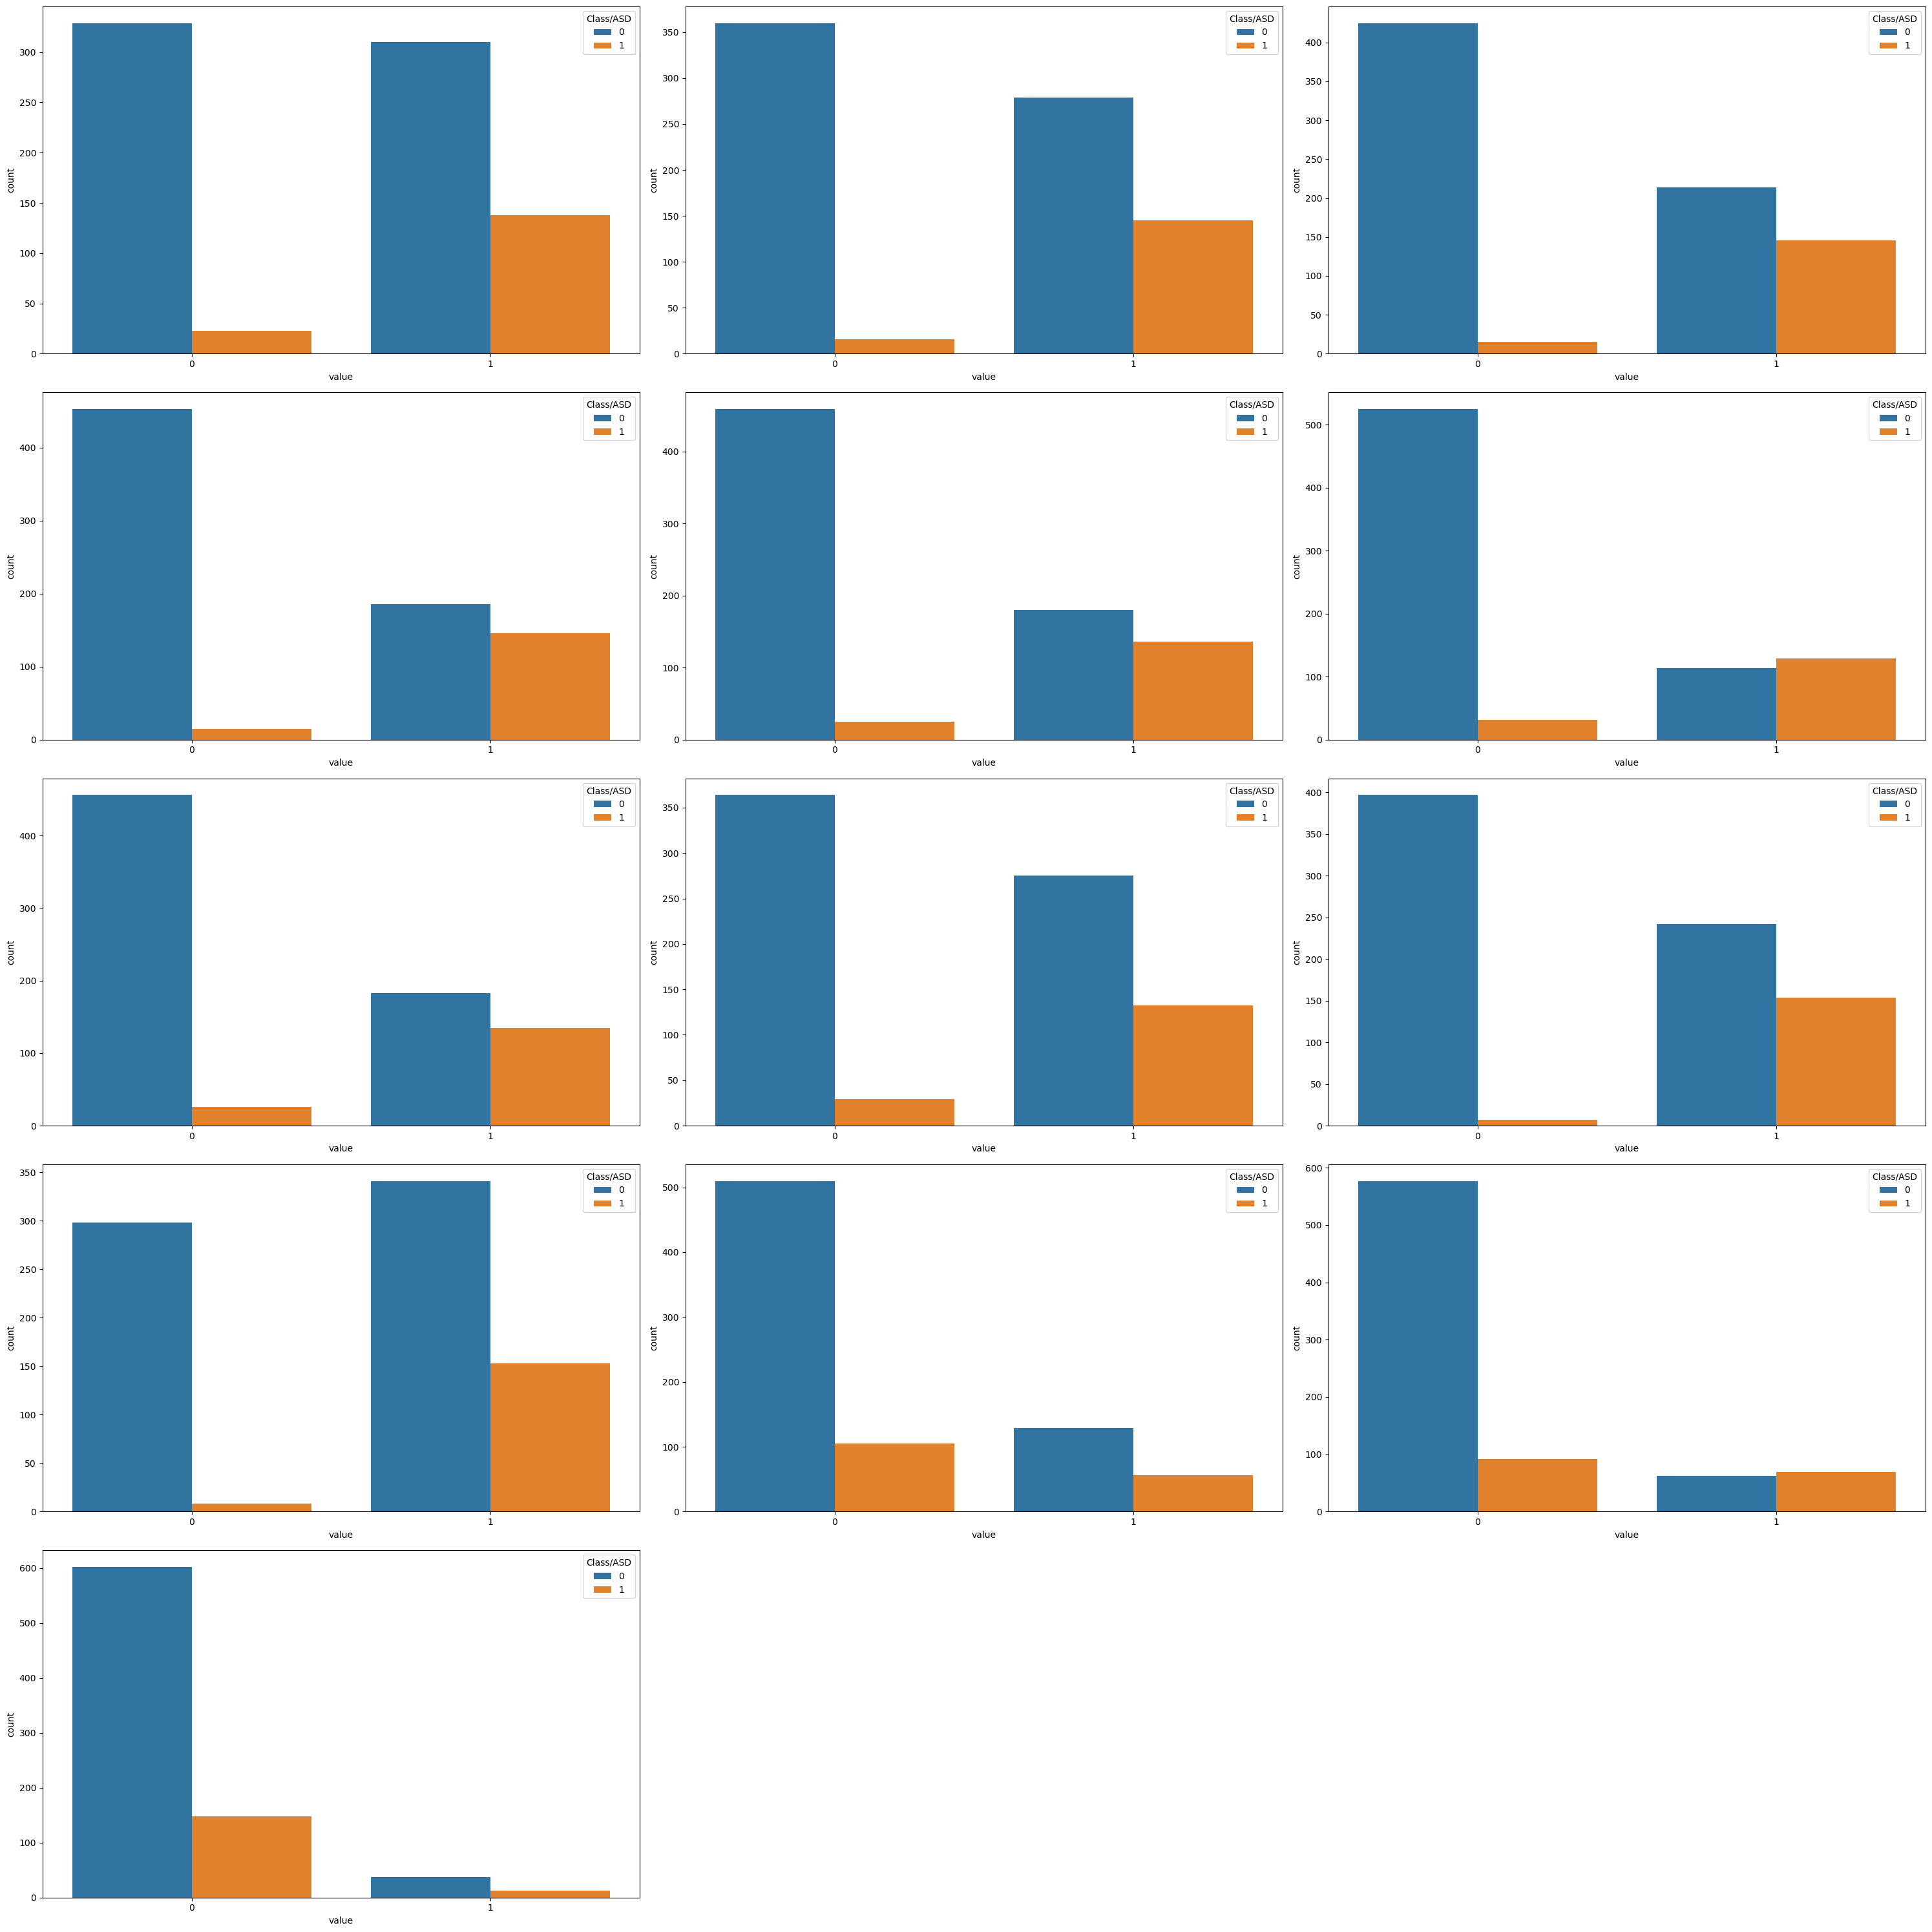

In [12]:
df_melted = df.melt(id_vars=["ID", "Class/ASD"], 
                    value_vars=ints, 
                    var_name='col',
                   value_name='value')

plt.subplots(figsize=(30,30))

for i, col in enumerate(ints):
    plt.subplot(5,3,i+1)
    
    # Use the melted DataFrame and specify x and hue
    sns.countplot(x='value', 
                 hue='Class/ASD',
                data=df_melted[df_melted['col']==col])
    
plt.tight_layout()
plt.show()

From these plots, we can conclude that if the score of some indicator is 0 then the chances of that person not having autism is quite hiigh except in the caase of A10_Score

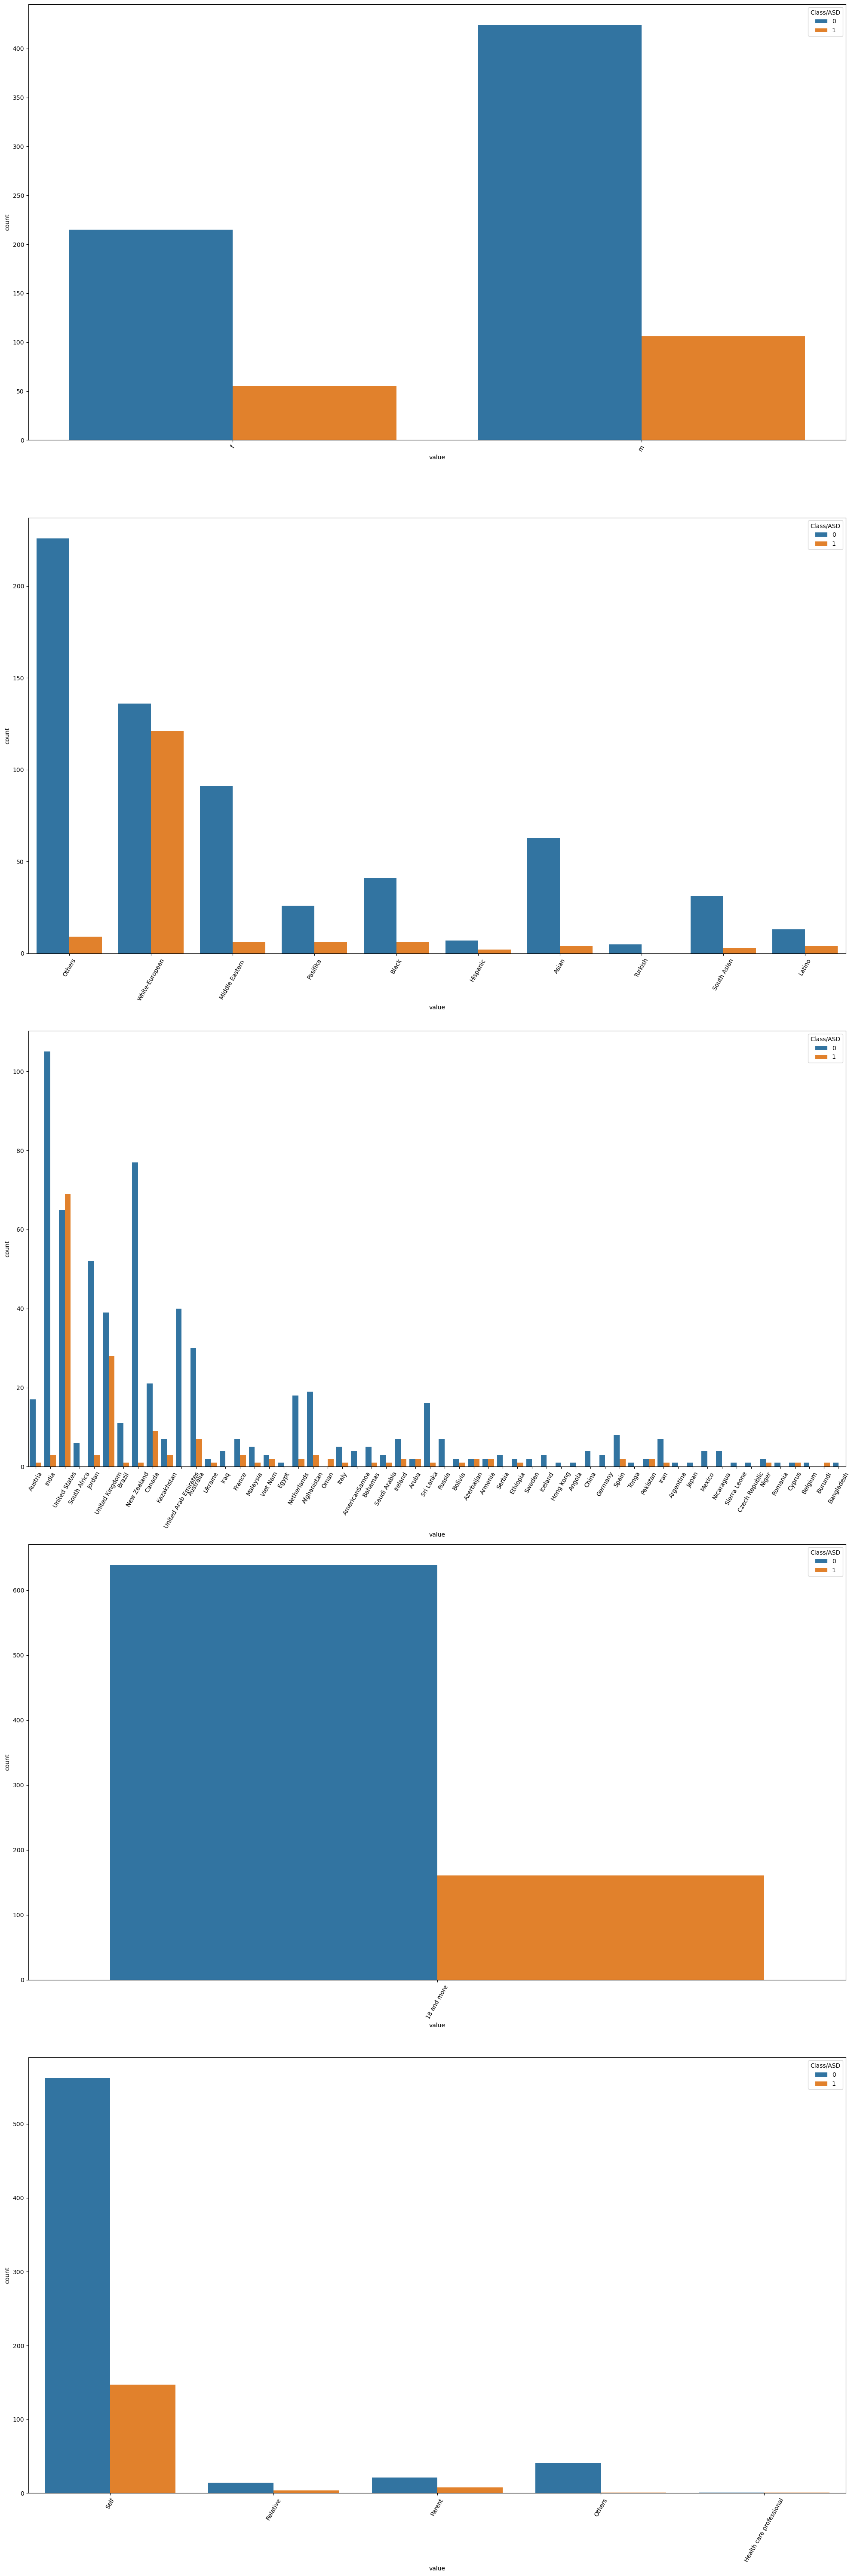

In [13]:
plt.subplots(figsize=(20,60))

for i, col in enumerate(objects):
    plt.subplot(5,1,i+1)
    
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'],
                       value_vars=[col],
                       var_name='col',
                       value_name='value')
    
    # Using the melted DataFrame and specify x and hue
    sns.countplot(x='value',
                hue='Class/ASD',
                data=df_melted)
    plt.xticks(rotation=60)
    
plt.tight_layout()
plt.show()

From above plots we can draw the following observations:
    
    * Age_desc is same for all the data points.
    * This used_app_before feature doesn't seem to be useful or it will be the source of data leakage.
    * Here the chances of a male having autism seems higher than a female but that is not true because we don't have equal number of examples of males and females.

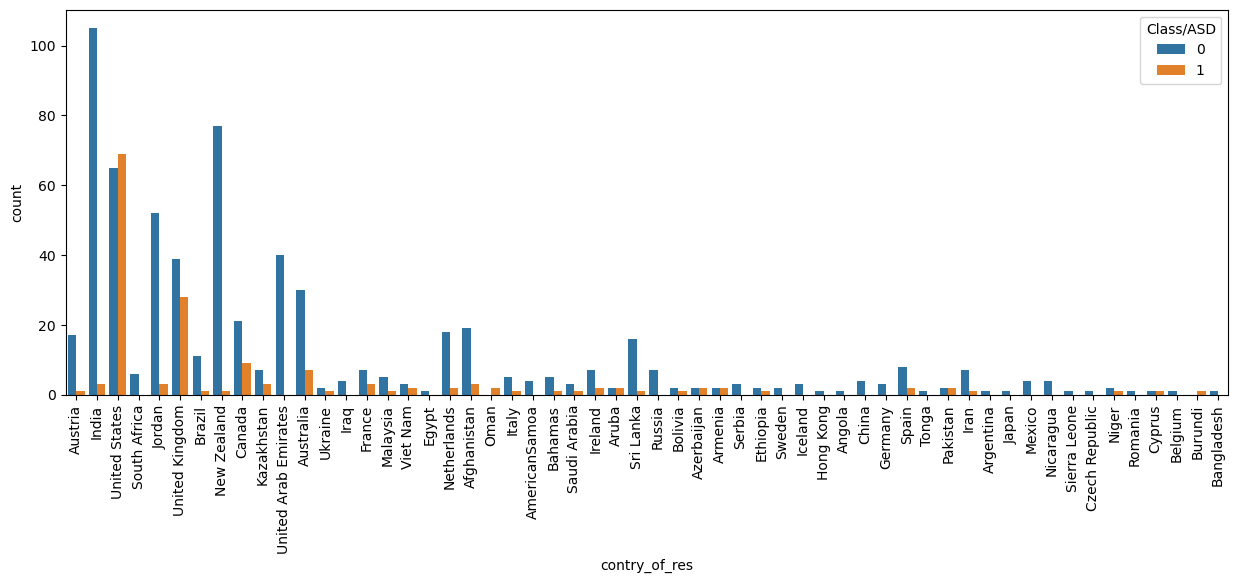

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In some places approximately 50% of the data available for that country have autism and in some places, this is quite low. This implies that the geography of a person also gives an idea of having autism.

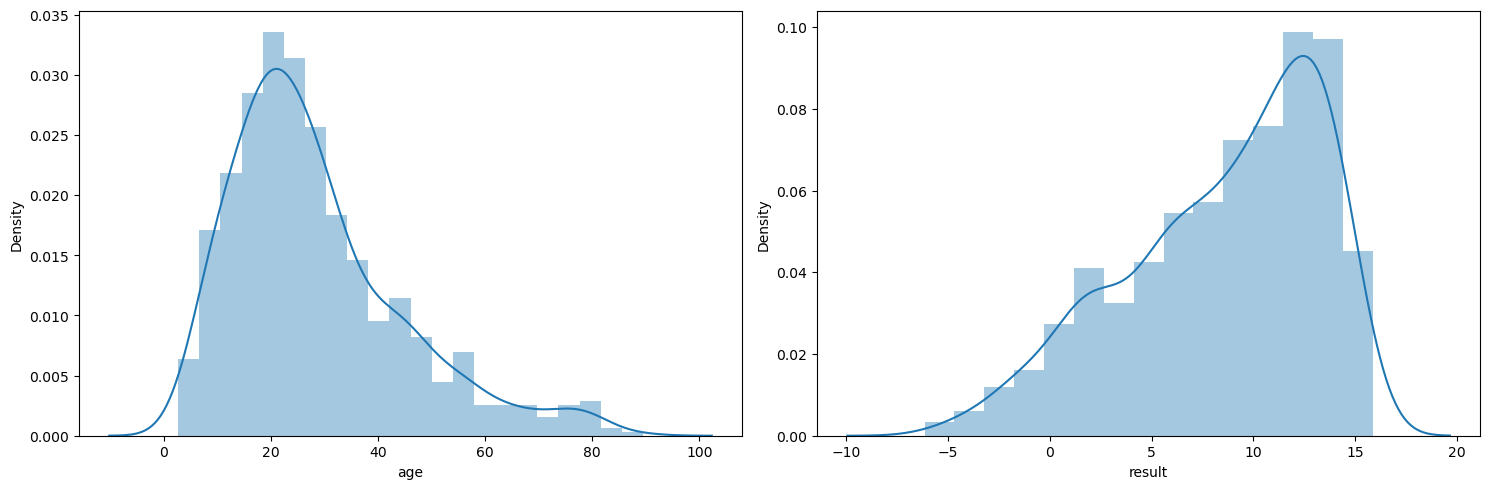

In [20]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

Both of the continuous data are skewed.

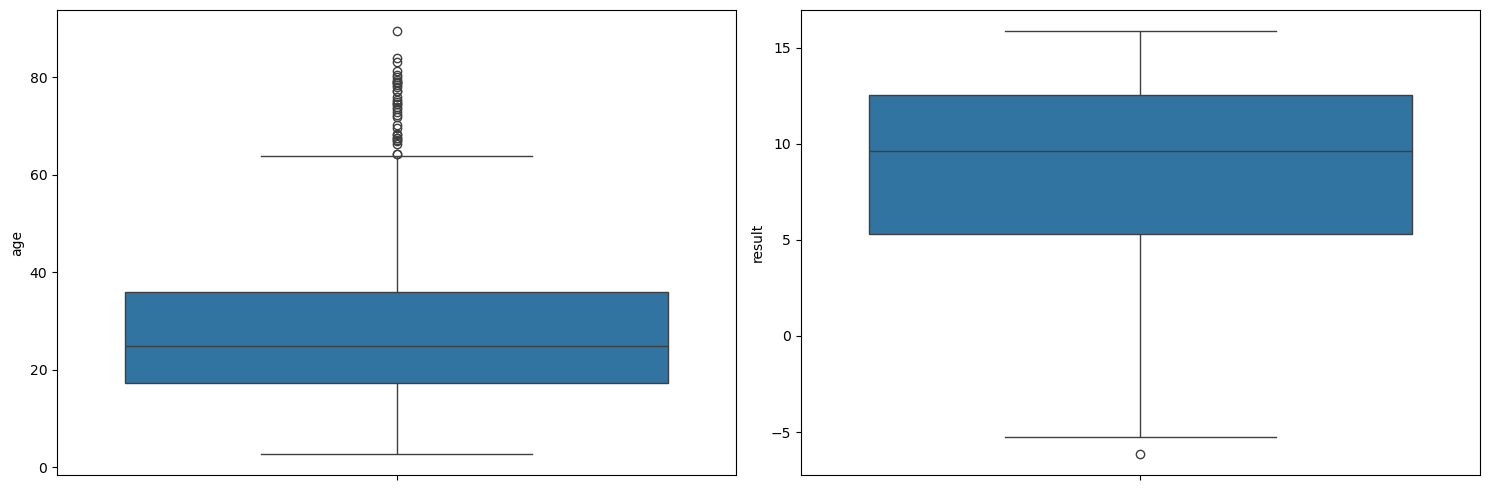

In [22]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

Removing Outliers in the result column as it doesn't seem like too much loss of information.

In [23]:
df = df[df['result']>-5]
df.shape

(798, 22)

Here we lost only 2 data points

# Feature Engineering

### Function to make groups by taking the age as a parameter

In [25]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'
    
df['ageGroup'] = df['age'].apply(convertAge)

### The number of cases for each age group

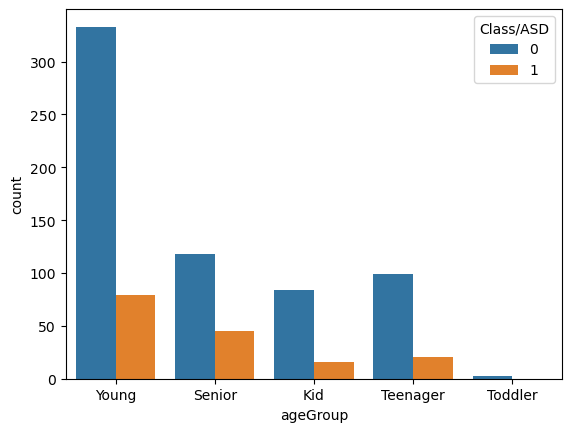

In [26]:
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

We can conlude that Young and Toddler group of people have lower chances of having Autism

### Summing up the clinical scores given from A1 to A10

In [29]:
def add_feature(data):
    # Creating a column with all values zero
    data['sum_score'] = 0
    for col in data.loc[:, 'A1_Score':'A10_Score'].columns:
        # Updating the 'sum_score' value with scores from A1 to A10
        data['sum_score'] += data[col]
    # creating a random data using the below three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']  
    return data

df = add_feature(df)

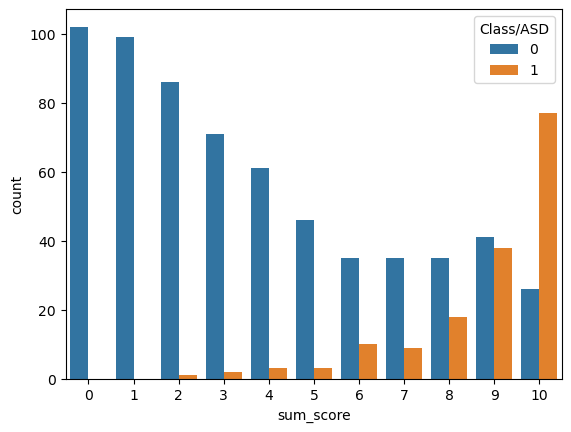

In [30]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

Higher the sum score, higher the chances of having autism.

For lower sum scores that are fo less than 5 it is rare that the person has autism

### Applying log transformation to remove the skewness of the data

In [31]:
df['age'] = df['age'].apply(lambda x: np.log(x))

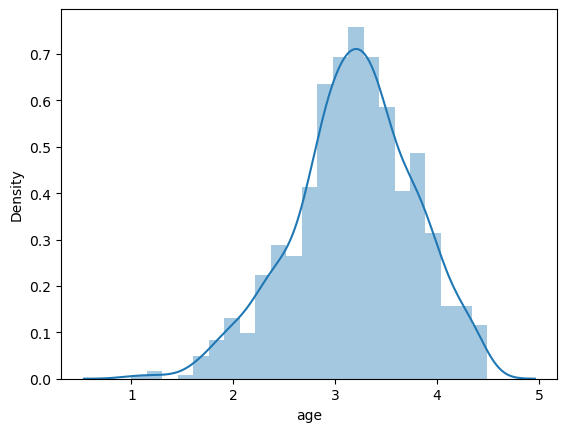

In [32]:
sns.distplot(df['age'])
plt.show()

### Checking if the datatype is object, if yes then encode it

In [33]:
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

### Making a heatmap to visualize the correlation matrix

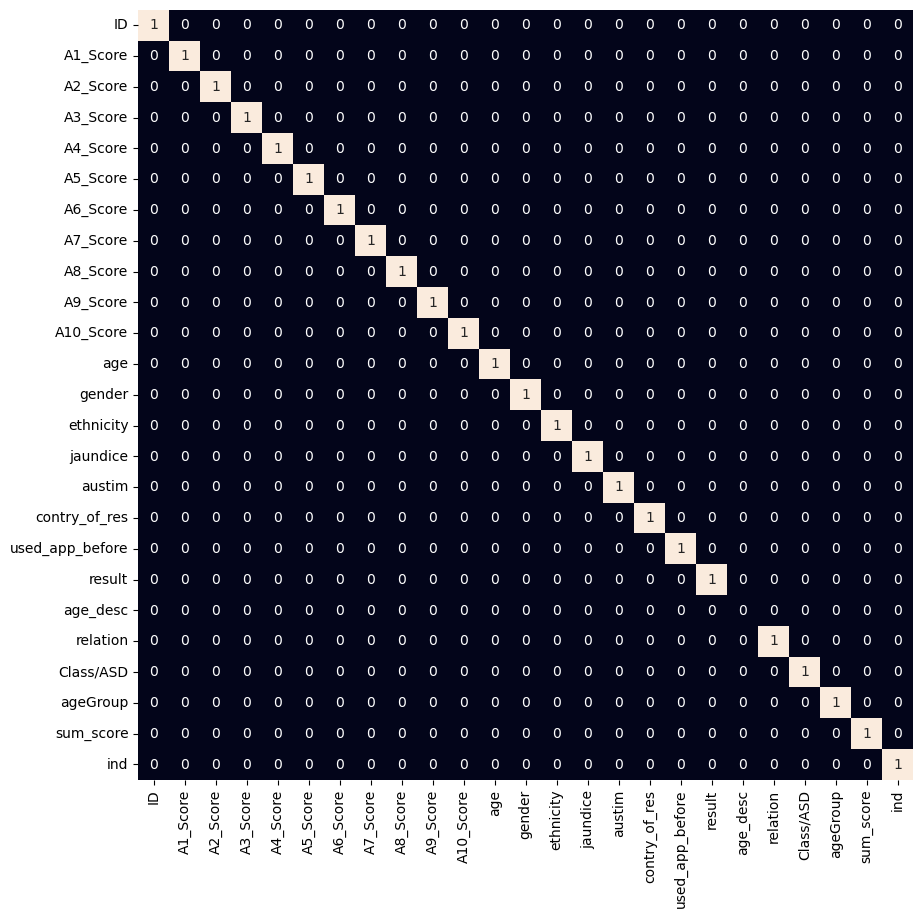

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

From the above heatmap we can see that there is only one highly correlated features which we will remove before training the model on this data as highly correlated features do not help in learning useful patterns in the data.

# Model Training

### Separating the features ad target variables and split them into training and testing data

In [35]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']

features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=10)

### As the data was highly imbalance we will balance it by adding repetative rows of minority class.


In [37]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)

X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape

((1026, 20), (1026,))

### Normalizing  the data to obtain stable and fast training

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

### Training the models

In [41]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X, Y)
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Testing Accuracy : ', metrics.roc_auc_score(Y_test, model.predict(X_test)))
    print()

LogisticRegression() : 
Training Accuracy :  0.8664717348927876
Testing Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Testing Accuracy :  0.7491039426523298

SVC() : 
Training Accuracy :  0.9405458089668616
Testing Accuracy :  0.

# Model Evaluation

From above accuracies, we can say that Logistic Regression and SVC classifier perform better on the validation data with less difference between the testing and training data.


### Plotting the confusion matrix for the testing data using each model

Using LogisticRegression() model


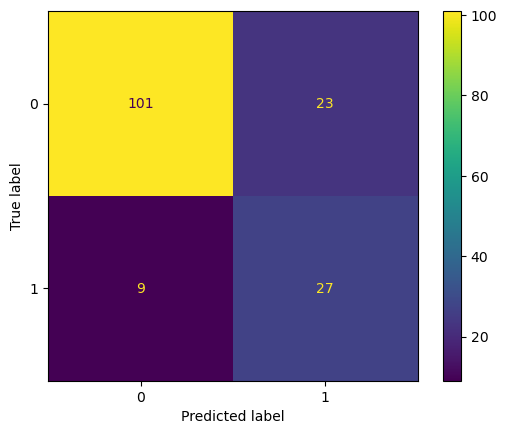

Using XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model


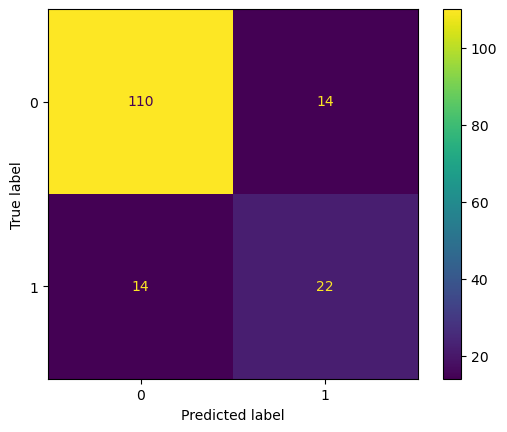

Using SVC() model


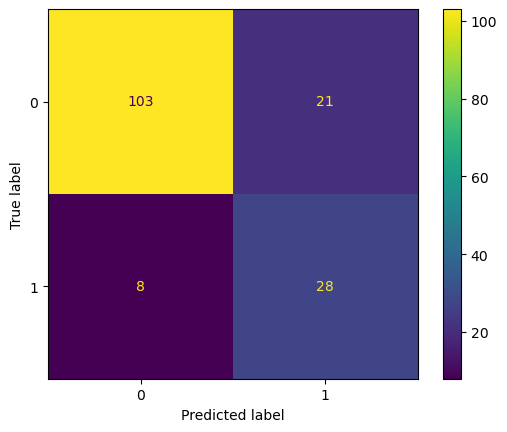

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

for i in range(3):
    print(f'Using {models[i]} model')
    ConfusionMatrixDisplay.from_estimator(models[i], X_test, Y_test)
    plt.show()

# Conclusion

The ML model we have created is around 80 - 85 % accurate